### Project Parameters

In [1]:
## Imports ##
import keras
import numpy as np
from keras import Sequential
from random import randint
from keras.utils import to_categorical
from keras.layers import Dense
from keras.layers import Dropout
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot

from IPython.display import display, SVG
import matplotlib.pyplot as plt
%matplotlib inline

## Constants ##
num_of_features = 4
verbose = 0
metrics = ['accuracy']

## Hyperparameters ##
epochs = 100
batch_size = 32
test_size = 10
optimizer = Adam()
loss = categorical_crossentropy

## Data ##
x_train = []
y_train = []
x_test = []
y_test = []

# Create training set
with open('dataset/iris-data.txt', 'r') as file:
    for line in iter(file.readline, ''):
        line = line.split()
        x_train.append(line[:num_of_features])
        y_train.append(line[num_of_features])
        
x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = to_categorical(y_train)

# Create test set
idx = [randint(0, x_train.shape[0] - 1) for _ in range(test_size)]
idx.sort()
idx.reverse()

for i in range(len(idx)):
    x_test.append(x_train[idx[i]])
    y_test.append(y_train[idx[i]])
    x_train = np.delete(x_train, idx[i], 0)
    y_train = np.delete(y_train, idx[i], 0)
    
x_test = np.array(x_test)
y_test = np.array(y_test) 

print('Shapes:')
print('x_train:\t', x_train.shape)
print('y_train:\t', y_train.shape)
print('x_test:\t\t', x_test.shape)
print('y_test:\t\t', y_test.shape)

Using TensorFlow backend.


Shapes:
x_train:	 (140, 4)
y_train:	 (140, 3)
x_test:		 (10, 4)
y_test:		 (10, 3)


### Model

In [6]:
model = Sequential()
model.add(Dense(32, 
                activation='relu', 
                input_shape=[x_train.shape[1]]))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss=loss, 
              optimizer=optimizer, 
              metrics=metrics)

### Model Details

In [7]:
# SVG(model_to_dot(model).create(prog='dot', format='svg'))
# model.summary()

### Training

In [10]:
history = model.fit(x_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=verbose)

10/10 [==============================] - 0s 157us/step


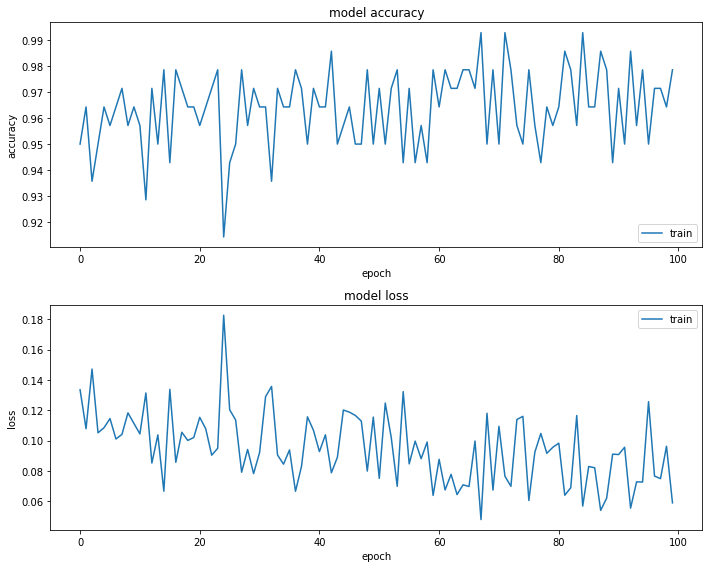

test loss:   0.301
test accuracy:  80.000 %


In [11]:
score = model.evaluate(x_test, y_test, verbose=1)
plt.figure(figsize=(10, 8))
plt.subplot(211)
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(212)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()
plt.show()

print('test loss: %7.3f' % score[0])
print('test accuracy: %7.3f' % (score[1] * 100), '%')